# __Assignment 2 - CBD3334 - Data Mining and Analysis__

## Topic: Mobile Price prediction using phone Specifications - Regression

### __Team Members__:

- 1) Aanal Patel - C0910376
- 2) Bimal Shresta - C0919385
- 3) Danilo Diaz - C0889539
- 4) Ernie Sumoso - C0881591
- 5) Jayachandhran Saravanan - C0910392


### Dataset and Onedrive links :

The following are the one-drive links of,

- __Dataset :__ https://mylambton-my.sharepoint.com/:f:/g/personal/c0910392_mylambton_ca/EhwQLYqY2UlBi_guvX2gZO4BYrpibfbQ6casj6iZUSFmkw?e=GZZf46

- __Whole working folder :__ https://mylambton-my.sharepoint.com/:f:/g/personal/c0910392_mylambton_ca/EvPW3EWqnKZNlLY49F2f3OgBdzTYFayKTQOFM7aI9wWgGw?e=q86q8E


- __Github :__ https://github.com/NILodio/data-mining

### __Main Sections__
1. Data collection
2. Pandas profiling report
3. EDA
4. Data Pre-processing
5. Model Pre-processing
6. Modelling and testing Pipeline
7. Hyper-parameter tuning
8. Tuned parameters computing models
9. Conclusions

### Importing packages

- all the required packages are imported starting from the loading the dataset in the form csv till the validation of model performance and plotting the values using visualization tools

In [1]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import hvplot.pandas
import plotly.express as px
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

import ydata_profiling as pp   
import warnings                             
warnings.filterwarnings('ignore')  

### 1. Data Collection

We gathered the data from Kaggle source (https://www.kaggle.com/datasets/pratikgarai/mobile-phone-specifications-and-prices).

Our data consist on Mobile Phone specifications along with the numerical-continuous target __price__ of the phones.

__Dataset Description__:

* __Name__ - Name of the mobile phone 
* __Brand__ - The Brand name of the particular mobile phone
* __Model__ - Model name specifces the version of the particular mobile phone (eg: iphone13 has mini,pro,promax as model names)
* __Battery capacity (mAh)__ - Defines the battey capacity in milli Amphere (hour)
* __Screen size (inches)__ - diagonal measurement of the screen in inches 
* __Resolution x & y__ - are the pixel values of respective axes
* __Processor__ - total number of physical and virtual processor 
* __RAM (MB)__ - processing memory is specified in MegaBytes
* __Internal Storage (GB)__ - storage size of the phone in GigaBytes
* __Rear and Front Camera__ - pixel capturing ability of the phonee using camera lens in MegaPixels 
* __Operating System__ - the operating system of the phone 
* __Number of SIMs__ - total number of SIM cards that can be accomodated in the phone
* Boolean columns that define if the phone has the following features: 
    - __Touchscreen__
    - __Wi-Fi__
    - __Bluetooh__
    - __GPS__
    - __3G__
    - __4G/ LTE__
* __Price__ (Target variable) - price of the phone in indian rupees (INR)

In [2]:
#creation of pandas dataframe and defining the read_csv function to load the data
df = read_csv(r'ndtv_data_final.csv')

In [3]:
df.head()

Unnamed: 0                            Name    Brand  \
0           0  OnePlus 7T Pro McLaren Edition  OnePlus   
1           1                   Realme X2 Pro   Realme   
2           2               iPhone 11 Pro Max    Apple   
3           3                       iPhone 11    Apple   
4           4                    LG G8X ThinQ       LG   

                    Model  Battery capacity (mAh)  Screen size (inches)  \
0  7T Pro McLaren Edition                    4085                  6.67   
1                  X2 Pro                    4000                  6.50   
2       iPhone 11 Pro Max                    3969                  6.50   
3               iPhone 11                    3110                  6.10   
4               G8X ThinQ                    4000                  6.40   

  Touchscreen  Resolution x  Resolution y  Processor  ...  Rear camera  \
0         Yes          1440          3120          8  ...         48.0   
1         Yes          1080          2400          8  ...         64.0   
2         Yes          1242          2688          6  ...         12.0   
3         Yes           828          1792          6  ...         12.0   
4         Yes          1080          2340          8  ...         12.0   

   Front camera  Operating system  Wi-Fi Bluetooth  GPS Number of SIMs   3G  \
0          16.0           Android    Yes       Yes  Yes              2  Yes   
1          16.0           Android    Yes       Yes  Yes              2  Yes   
2          12.0               iOS    Yes       Yes  Yes              2  Yes   
3          12.0               iOS    Yes       Yes  Yes              2  Yes   
4          32.0           Android    Yes       Yes  Yes              1   No   

   4G/ LTE   Price  
0      Yes   58998  
1      Yes   27999  
2      Yes  106900  
3      Yes   62900  
4       No   49990  

[5 rows x 22 columns]

In [4]:
# function to show the number of columns and rows of a dataset, including column names
def display_shape_and_columns(df, colnames=True):
    print("# of Rows:", df.shape[0])
    print("# of Columns:", df.shape[1])
    if colnames:
        print("Column names:", df.columns.to_list())
display_shape_and_columns(df)

# of Rows: 1359
# of Columns: 22
Column names: ['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)', 'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS', 'Number of SIMs', '3G', '4G/ LTE', 'Price']


In [5]:
# get rid of the unnecesary unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)
display_shape_and_columns(df)

# of Rows: 1359
# of Columns: 21
Column names: ['Name', 'Brand', 'Model', 'Battery capacity (mAh)', 'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS', 'Number of SIMs', '3G', '4G/ LTE', 'Price']


### 2. Pandas Profiling Report

Pandas Profiling Report is a powerful tool that allows to perform a complete Exploratory Data Analysis on a very few lines of code.

Let's generate this report and save it, using our phone dataset.

In [6]:
pandas_profile_report=pp.ProfileReport(df)

In [7]:
pandas_profile_report.to_file('analytics.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3. Exploratory Data Analysis

Let's dive into an exploratory data analysis of our available dataset.

#### We will define a Class for the EDA

Methods used in the following class are:
- Check for missing values
- Check for duplicated values 
- Numeric column summary and statistics 
- Clear information on the data_types present in the columns
- colPrice method helps in understanding the distribution of the numeric values and articulate primary idea of the data
- calculateOutliers and outliersBox methods are used to detect the extreme values present in the numeric columns
- frecount and bollvalue plots are used to list out the categorical values and also frequency chart for each unique values present in the partciular categorical columns
- corr method is utlised to check the general correaltion of numeric features present in the data

In [8]:
class EDABasic:
    def __init__(self, df, numcols, catcols):
        #constructor is used to initalize the dataframe, numeric columns and categoical columns
        self.df = df
        self.numcols = numcols
        self.catcols = catcols
        self.basicEDA()
        
    def basicEDA(self):
        '''
            function: basicEDA -> This function is used for the basic EDA of data frame such as shape, statstic summary
            arg: None
            return: None
        '''
        # checking the shape of the data frame
        shape = self.df.shape
        print("SHAPE OF DATAFRAME:")
        print('Columns = {}'.format(shape[0]))
        print('Rows = {}\n\n'.format(shape[1]))
        
        # cheking the missing values
        nullValues = self.df.isna().sum()
        noNull = 'No Null values' if nullValues.sum == 0 else nullValues
        print('Checking the missing values:\n')
        print('Missing values:\n{}\n\n'.format(noNull))
        
        # checking the duplicates
        duplicates = self.df.duplicated().sum()
        noduplicates = 'No Duplicat values' if duplicates == 0 else duplicates
        print('Checking the Duplicate values:')
        print('Duplicate values = {}\n\n'.format(noduplicates))
        
        # statstic summary of data frame
        print('The static summary: ')
        des = self.df.describe().T.reset_index()
        des.rename({'Index': 'Stats'}, inplace=True)
        dasData = des.to_dict(orient='list')
        table = tabulate(dasData, headers='keys', tablefmt='github', numalign='right') # tabulate converts data into table format
        print(table, '\n\n')
        
        # information of the data set
        print('The information: ')
        print(self.df.info(),'\n\n')
        
    def colPrice(self):
        '''
            function: colPrice -> shows the distribution of price in against other numaric columns in data frame using line graph
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        #gathering all numerical column names into a list for easy access 
        numlist = self.numcols.columns.tolist()
        plt.figure(figsize=(5, 5))
        
        #plotting the distribution of data against price values
        for column in range(0, len(numlist)-1, 2):
            #subplots are created to have a comprised view of the distribution
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            sns.lineplot(x=self.numcols[numlist[column]], y=self.df['Price'], data=self.numcols, ax=axes[0])
            axes[0].set_title(numlist[column])

            sns.lineplot(x=self.numcols[numlist[column + 1]], y=self.df['Price'], data=self.numcols, ax=axes[1])
            axes[1].set_title(numlist[column + 1])

            plt.show()
        
    def calculateOutlires(self):
        '''
            function: calculateOutlires -> calculates the outlires in each numarical columns using IQR method
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        numlist = self.numcols.columns.tolist()
        #essential 5 number summaries of the numeric values are calculated
        dataList = [['Name', 'q1', 'q3', 'IQR', 'Count']]
        #quantiles are measured to isolate the outliear values present in each columns
        for column in range(len(numlist)-1):
            q1 = self.numcols[numlist[column]].quantile(0.25)
            q3 = self.numcols[numlist[column]].quantile(0.75)

            IQR = q3 - q1

            lB = q1 - 1.5 * IQR
            uB = q3 + 1.5 * IQR
            dataList.append([numlist[column],q1,q3,IQR,((self.numcols[numlist[column]] < lB) | (self.numcols[numlist[column]] > uB)).sum()])
        table = tabulate(dataList, tablefmt='pretty') # tabulate converts data into table format
        print(table)
    
    def outliresBox(self):
        '''
            function: outliresBox -> shows the distribution of outlires using box plots
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        numlist = self.numcols.columns.tolist()
        for column in range(0, len(numlist)-1, 2):
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #plotting boxplots with the same combination of 2-axis 
            sns.boxplot(self.numcols[numlist[column]], ax=axes[0])
            axes[0].set_title(numlist[column])
            
            sns.boxplot(self.numcols[numlist[column + 1]], ax=axes[1])
            axes[1].set_title(numlist[column + 1])
    
    def bollValuePlot(self, df):
        '''
            function: bollValuePlot -> shows the distribution of boolean features from the data set using pie charts
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        #pie-chart to visualize the binary value columns 
        fig, axes = plt.subplots(2, 3, figsize=(10,7))
        #flatten the axes to have side-side view
        axes = axes.flatten()
        #color palettes for the different binary values
        palettes = ['pastel', 'deep', 'bright', 'muted', 'colorblind', 'viridis']
        font_size = 15
        title_font = 20
        
        for i, (columnNmae, ax) in enumerate(zip(df.columns, axes)):
            size = df[columnNmae].value_counts()
            palette = sns.color_palette(palettes[i])
            ax.pie(size, labels=size.index, colors=palette, autopct='%1.1f%%', startangle=140, textprops={'fontsize': font_size})
            ax.set_title(columnNmae, fontsize=title_font)
            
        plt.tight_layout()
        plt.show()
        
    def FreCount(self, col, figsize_, dispercent):
        '''
            function: FreCount -> counts the percentage of catagorical columns and show the distribution using bar plots
            arg: col (pandas.core.series.Series) -> column of the data set
                 figsize_ (tuple) -> size of the graph
                 dispercent (boolean) -> 1: display the percentage of the distribution
                                         0: does not display the percentage of the distribution
            return: None
        '''
        df_brand = col.value_counts() 
        #calculating the percentage of the unique values frequency
        percent = round((df_brand * 100) / self.df.shape[0], 2)
        
        plt.figure(figsize=figsize_)
        ax = sns.barplot(x=percent.index, y=percent.values, palette='dark')
        plt.xlabel(col.name)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        if dispercent:
            for i, value in enumerate(percent):
                plt.text(i, value, str(value), ha='center', va='bottom')
        plt.show()
        
    def corr(self):
        '''
            function: corr -> Represent the correlation of each numaric column using heat map
            arg: None
            return: None
        '''
        #using pearson correlation to plot the numeric value contributions 
        coff = self.df.corr(method='pearson', numeric_only=True)
        plt.figure(figsize=(12,10))
        sns.heatmap(data=coff, cmap="coolwarm", annot=True, fmt=".2f", linewidths=1, linecolor='black')
        plt.show()

We will separate the dataframe into __numeric and categorical columns__ using our pre-defined function

Let's also __drop the Name column__, as it is not giving any significance to the prediction on analysis.

In [9]:
numcols = df.select_dtypes(include='number') # numeric column data set
catCols = df.select_dtypes(exclude='number') # catagorical column data set
catCols.drop(columns=['Name'], inplace=True) 

In [10]:
numcols.head()

Battery capacity (mAh)  Screen size (inches)  Resolution x  Resolution y  \
0                    4085                  6.67          1440          3120   
1                    4000                  6.50          1080          2400   
2                    3969                  6.50          1242          2688   
3                    3110                  6.10           828          1792   
4                    4000                  6.40          1080          2340   

   Processor  RAM (MB)  Internal storage (GB)  Rear camera  Front camera  \
0          8     12000                  256.0         48.0          16.0   
1          8      6000                   64.0         64.0          16.0   
2          6      4000                   64.0         12.0          12.0   
3          6      4000                   64.0         12.0          12.0   
4          8      6000                  128.0         12.0          32.0   

   Number of SIMs   Price  
0               2   58998  
1               2   27999  
2               2  106900  
3               2   62900  
4               1   49990

In [11]:
print('BASIC EDA\n')
eda = EDABasic(df, numcols, catCols) # creating a class instance

BASIC EDA

SHAPE OF DATAFRAME:
Columns = 1359
Rows = 21


Checking the missing values:

Missing values:
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64


Checking the Duplicate values:
Duplicate values = No Duplicat values


The static summary: 
| index                  |   count |    mean |      std |   min |    25% |   50% |   75% |    max |
|------------------------|---------|---------|----------|-------|--------|-------|-------|--------|
|

Let's plot the relationship of each numerical column with our target price.

We will __visualize how the price changes depending on the behaviour of each feature.__

<Figure size 500x500 with 0 Axes>

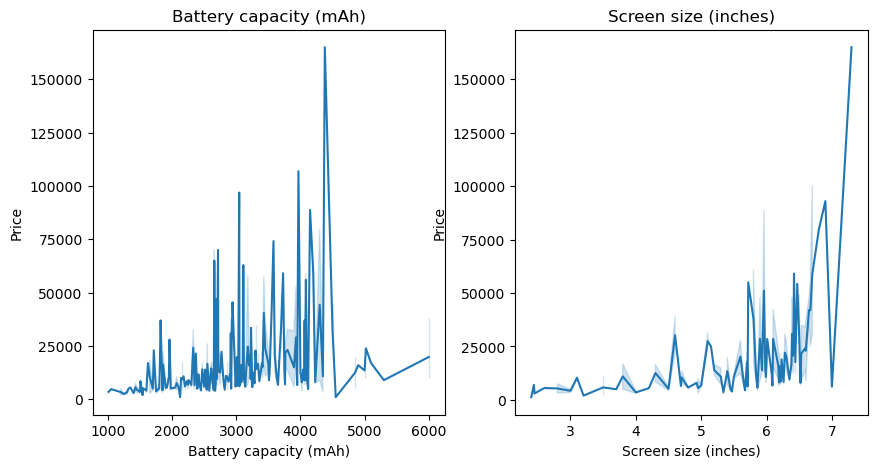

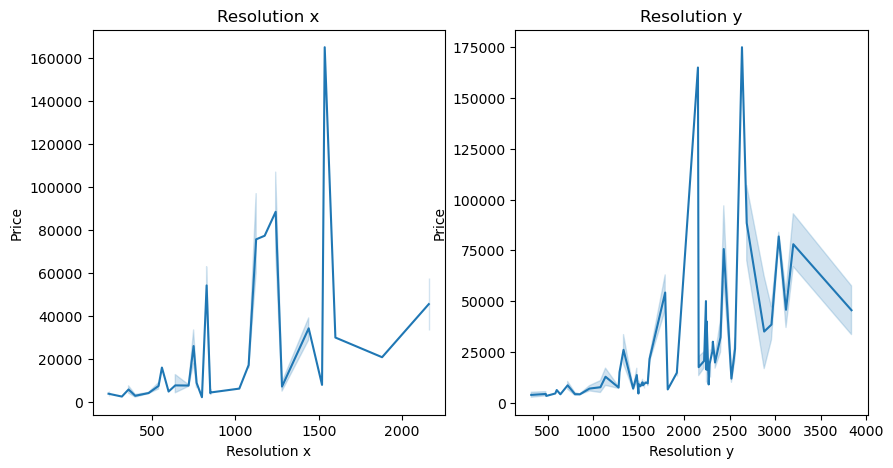

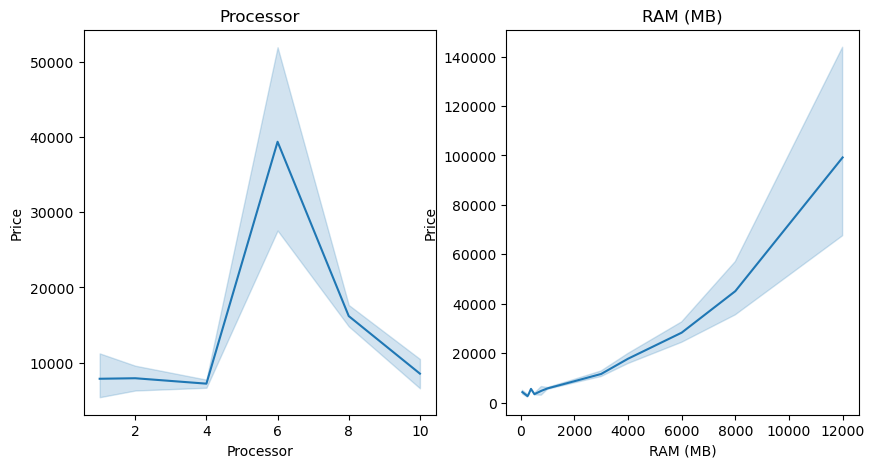

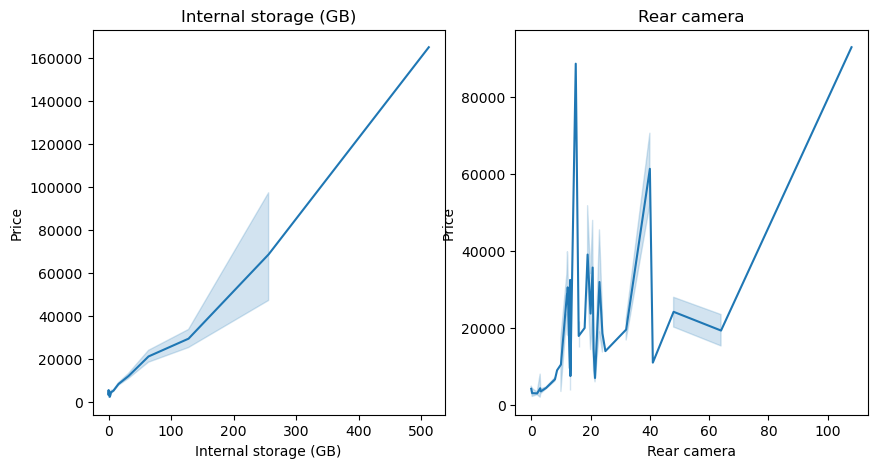

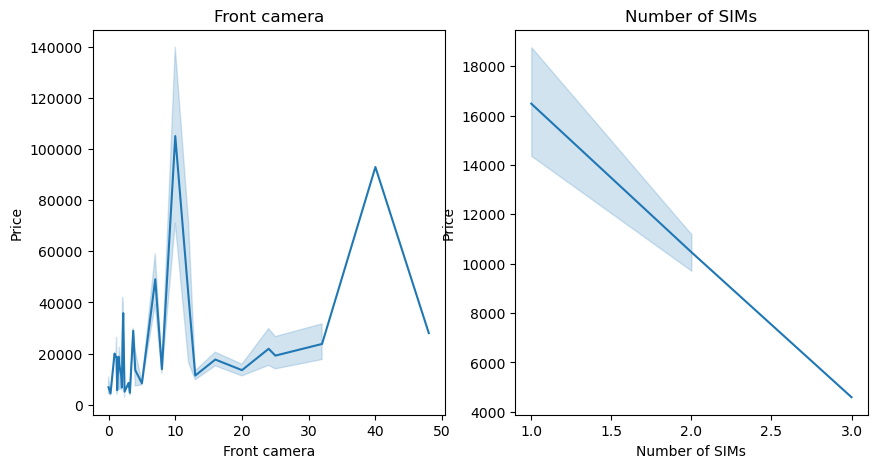

In [12]:
eda.colPrice()  #creating a method instance to plot the distrubtion of numeric values

__Insights:__
- Nearly all columns show a positive correlation between the feature and the price.
- Internal Storage (GB) and RAM (MB), both features show the strongest positive correlation to the target price.
- Number of SIMs of the phone shows a negative correlation to the price, as price goes down when having more SIM cards.
- Some features (rear and front camera, processor) seem to be uncorrelated to the target, as prices have high variance

In [13]:
eda.calculateOutlires() #creating 5 number statistical summeries and the count values
eda.outliresBox() #plotting the boxplot

+------------------------+--------+--------+--------------------+-------+
|          Name          |   q1   |   q3   |        IQR         | Count |
| Battery capacity (mAh) | 2300.0 | 3500.0 |       1200.0       |   3   |
|  Screen size (inches)  |  5.0   |  5.7   | 0.7000000000000002 |  22   |
|      Resolution x      | 720.0  | 1080.0 |       360.0        |   3   |
|      Resolution y      | 1280.0 | 1920.0 |       640.0        |  21   |
|       Processor        |  4.0   |  8.0   |        4.0         |   0   |
|        RAM (MB)        | 1000.0 | 3000.0 |       2000.0       |  33   |
| Internal storage (GB)  |  8.0   |  32.0  |        24.0        |  79   |
|      Rear camera       |  8.0   |  13.0  |        5.0         |  91   |
|      Front camera      |  2.0   |  8.0   |        6.0         |  79   |
|     Number of SIMs     |  2.0   |  2.0   |        0.0         |  228  |
+------------------------+--------+--------+--------------------+-------+


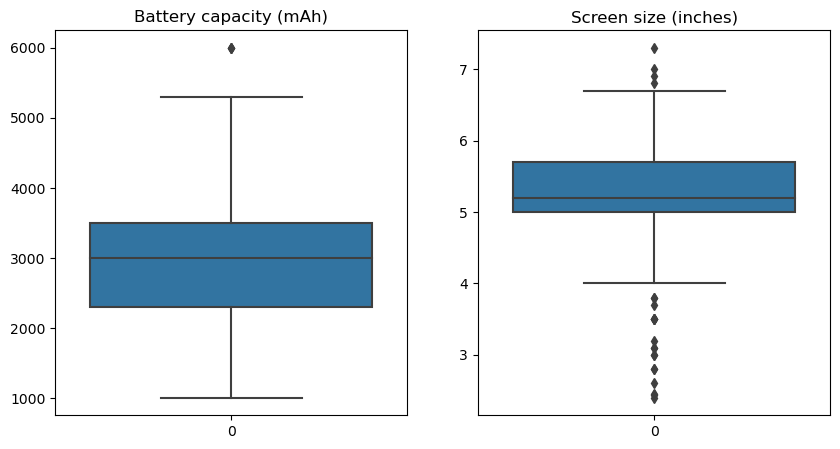

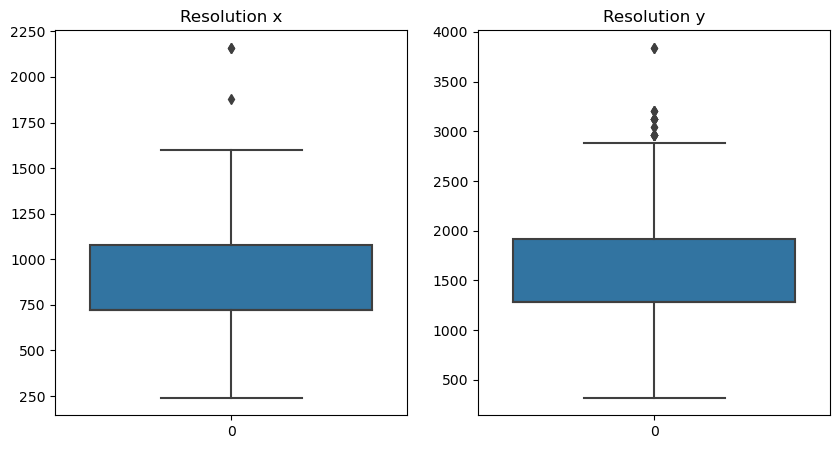

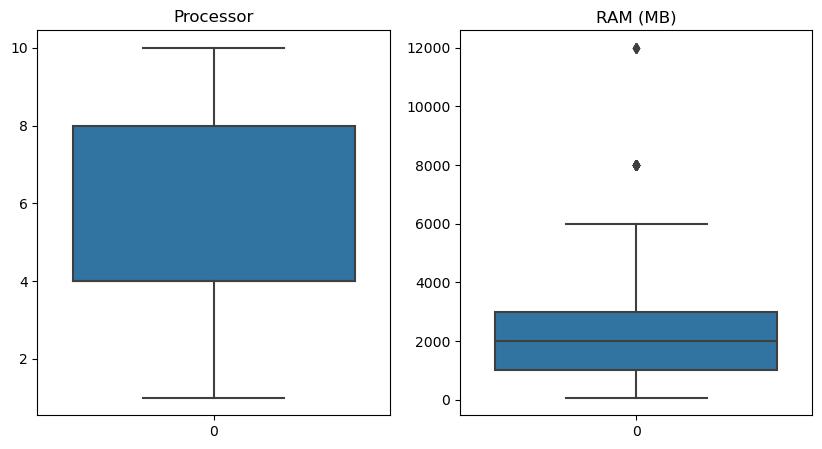

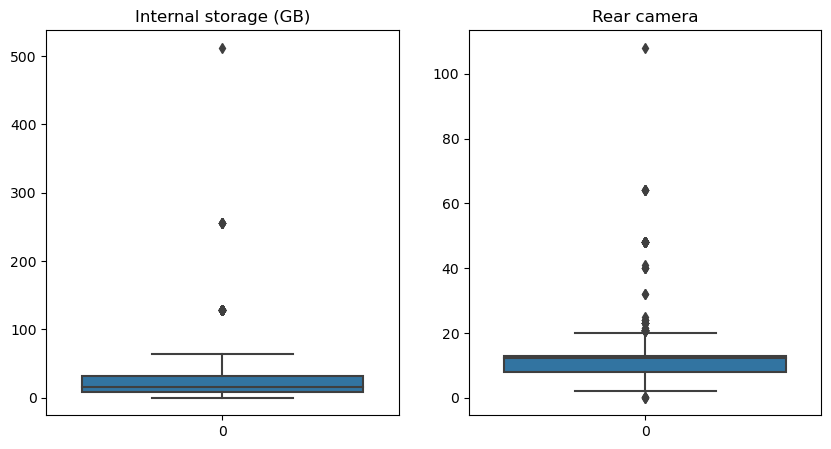

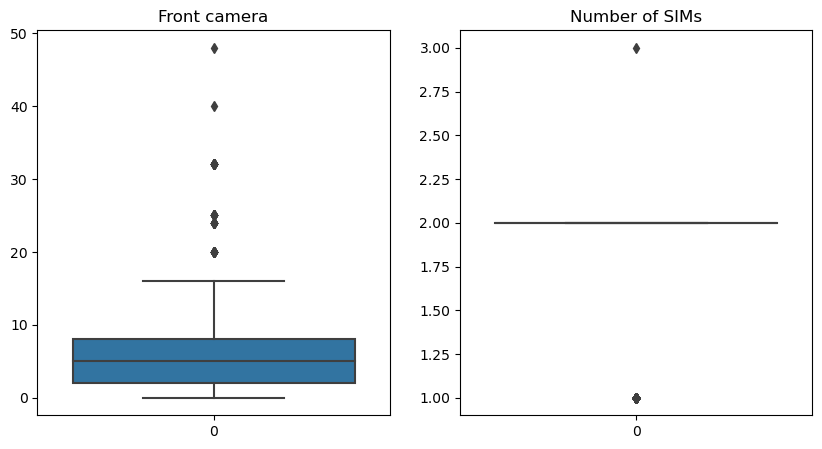

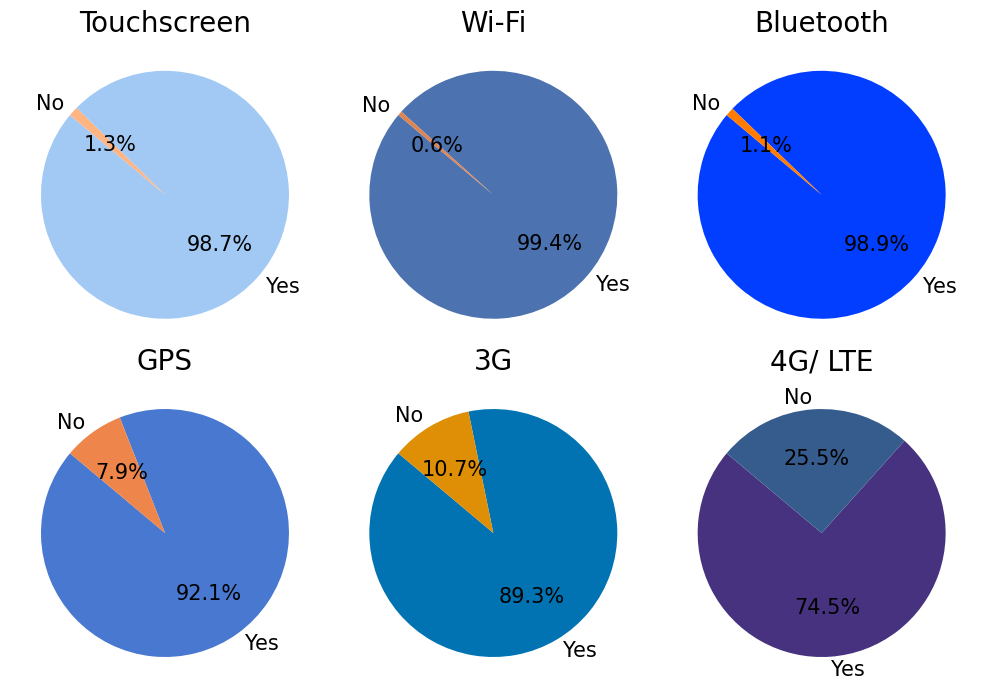

In [14]:
eda.bollValuePlot(catCols.drop(columns=['Brand', 'Model', 'Operating system'])) #ignoring the categorical values 

__Insights:__
- Most features are present in most phones
- These boolean features have imbalanced classes, as most rows are having True values.
- Using boxplots we could visualize some outliers on our numerical columns.

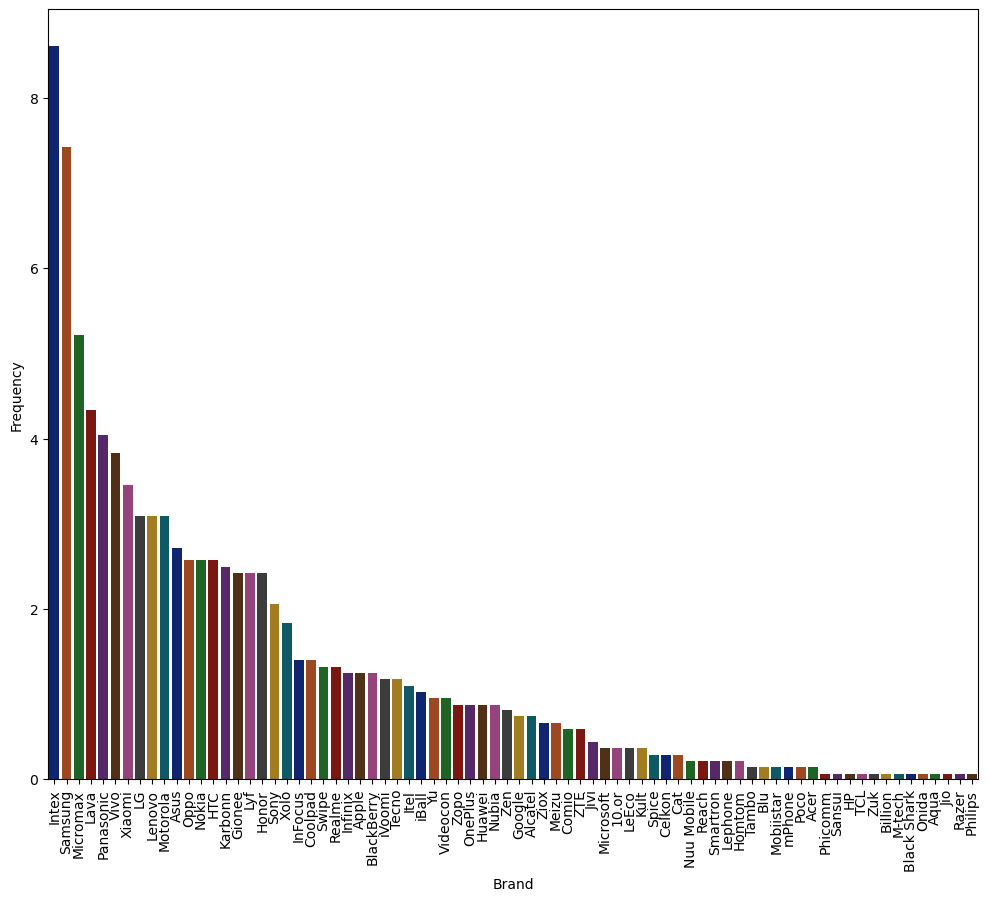

In [15]:
eda.FreCount(df['Brand'], (12, 10), 0) #frequency plot on the Brand name of the mobile phones 

__Insights:__
- Intex is the most common brand upon the phones
- Most phones belong to 20% of the brands, while the rest are accross 80% of the brands.

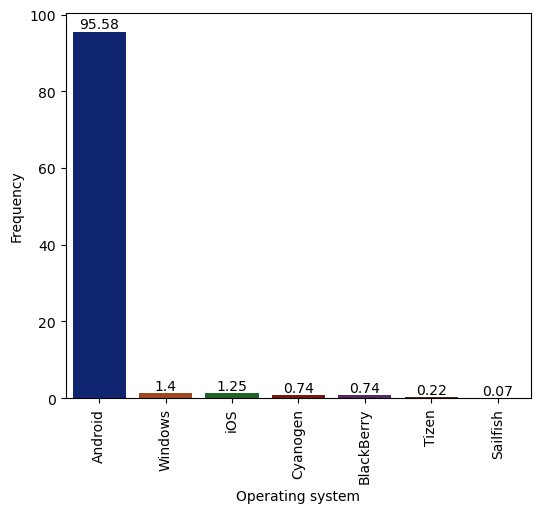

In [16]:
eda.FreCount(df['Operating system'], (6,5), 1) #frequency plot on the operating systems of the mobile phones 

__Insights:__
- Our Operating System feature is totally imbalanced, showing a 95% values for Android systems
- This suggests that the feature has very low correlation to our target, as most values are equal.
- This feature could be irrelevant, as it mostly has 1 single value.

Let's __plot a heatmap__ to find the relation between all our numeric features

In [17]:
# eda.corr()

![](https://cdn.jsdelivr.net/gh/svjai/AML_2203_project@main/images/8.png)

__Insights:__
- As we suspected before, the most correlated features to our target are RAM and Internal Storage
- After those 2 features, the next 2 most correlated are Resolution X & Y of the phone.
- Most of our features are positively correlated to our target (with the exception of Number of SIMs)
- Most of our features have < 50% correlation to our target
- We have some features correlated between themselves:
    - Internal Storage vs RAM
    - RAM vs Resolution Y
    - Resolution X vs Resolution Y
    - Screen Size vs Battery capacity
    
These __correlation between independent variables are dangerous to future models__ as the could affect the model stabilization.

### 4. Data Pre-processing

Let's start with the pre-processing by defining a new class __col_analyser.__

This class is in charge of the following methods:
- Analyzing categorical features of our dataframe
- Analyzing numerical features of our dataframe
- Identifying features with high correlation between themselves and to the target
- Make various visualizations for the feature analysis using QQplot.

In [18]:
class col_analyser:
    def __init__(self,data):
        """
        arg: dataframe to be processed for analysising the numeric and categorical columns

        function: class_constructor

        return: None
        """
        #initialising the dataframe for the following methods in the class
        self.df=data
        
    def categorical_analyze(self):
        """
        arg: None

        function: detailed analysis (unique value and its count) of categorical columns present in the dataframe 

        return: dataframe describing each categorical variable characteristic --> used to transform for pre-processing 
        """
        #creating temp_categorical column name list 
        self.categorical_columns=self.df.select_dtypes(include=['object']).columns.tolist()
        
        cat_tab=[]
        for i in self.categorical_columns:
            #loading the number of unique values present 
            unique_element_counts=self.df[i].nunique()
            #(distinct)unique values 
            unique_elements=self.df[i].unique()
            cat_tab.append({'cat_column_name':i,'unique_value_counts':unique_element_counts,'unique_values':unique_elements})
        return pd.DataFrame(cat_tab)
    
    
    def numerical_analyze(self):
        """
        arg: None

        function: Visualizing the distribution and QQ plots to apply standradization on top of the numeric values before training

        return: None
        
        call: initiate the validation method 
        """
        self.numerical_columns=self.df.select_dtypes(include='number').columns.tolist()
         #creating temp_numerical column name list 
        for i in self.numerical_columns:
            unique_element_counts=self.df[i].nunique()
            sns.set_style('darkgrid')
            fig,axs=plt.subplots(1,2,figsize=(14,6))
            sns.histplot(df[i],ax=axs[1])
            stats.probplot(df[i],plot=axs[0],fit=True)
            #using prob_plot to analyse the theoratical distribution values with the actual values
            axs[0].set_title('QQ_plot')
            axs[1].set_title('distribution')
            #comparing the distribution plot
            fig.suptitle("numerical column analysis - {}".format(i))
            plt.tight_layout()
            plt.show()
        self.validation_()
        
      
    def validation_(self):

        """
        arg: None

        function: overall numeric and categorical columns post analysis

        return: None
        """
        print("Categorical columns are :{}".format(self.categorical_columns))
        print("numerical columns are :{}".format(self.numerical_columns))

    def correlation_with_target(self,df,target):

        """
        arg: dataframe on which correlation need to be applied
        arg: target column to calculate the correlation 

        function: correlation analysis (numeric values with respect to target variable)

        return: correlation values in descending (importance) order
        """
        #target variable based correlation analysis on the numeric columns present 
        return(df.corr()[target].round(3).sort_values(ascending=False))
    
    def possible_high_correlation(self,df):


        """
        arg: dataframe

        function: identifying features of high correlation

        return:  columns which are having possiblity of correlations
        """
        #reanalysing the correaltion done prior to check the multi-collinear data present 
        correlation_=df.corr()
        unique_columns_with_high_correlations=set()
        for i in range(len(correlation_.columns)):
            for j in range(i):
                #setting our threshold to 0.6 (60%) of correaltion to be allowed
                if abs(correlation_.iloc[i,j])>0.6:
                    suspect_column=correlation_.columns[i]
                    unique_columns_with_high_correlations.add(suspect_column)
        return(unique_columns_with_high_correlations)
        

In [19]:
feature_analyze=col_analyser(df) #creating the class instance for the col_analyser

Let's start by __analyzing unique values of our categorical features__.

In [20]:
feature_analyze.categorical_analyze() #analysing of the unique values and its counts (categorical values )

cat_column_name  unique_value_counts  \
0              Name                 1359   
1             Brand                   76   
2             Model                 1321   
3       Touchscreen                    2   
4  Operating system                    7   
5             Wi-Fi                    2   
6         Bluetooth                    2   
7               GPS                    2   
8                3G                    2   
9           4G/ LTE                    2   

                                       unique_values  
0  [OnePlus 7T Pro McLaren Edition, Realme X2 Pro...  
1  [OnePlus, Realme, Apple, LG, Samsung, Asus, Xi...  
2  [7T Pro McLaren Edition, X2 Pro, iPhone 11 Pro...  
3                                          [Yes, No]  
4  [Android, iOS, Cyanogen, BlackBerry, Windows, ...  
5                                          [Yes, No]  
6                                          [Yes, No]  
7                                          [Yes, No]  
8                                          [Yes, No]  
9                                          [Yes, No]

__Plot distribution maps using QQ_plot__

- along with the boxplot analysis that we created before, we are using QQplot now to check the numeric column analysis
- the distribution and the probability plots are displayed to do compartive analysis on the projected theoratical values and the actual values
- the discrete set of values are being ignored as they are trivial

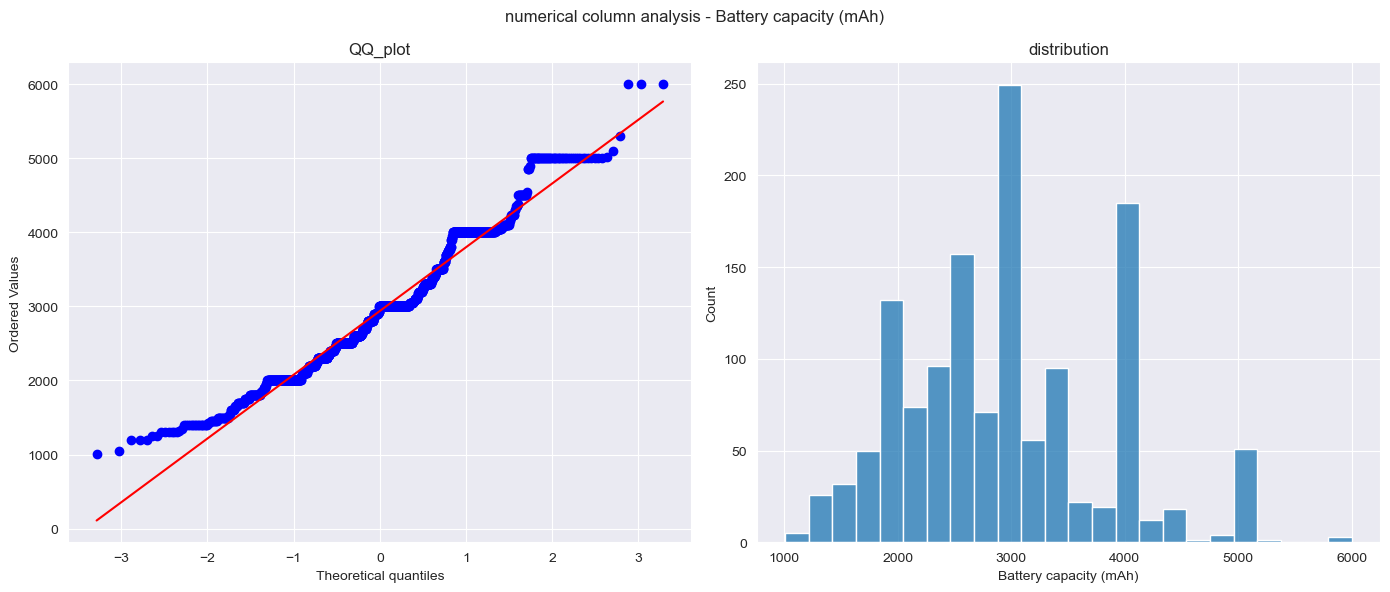

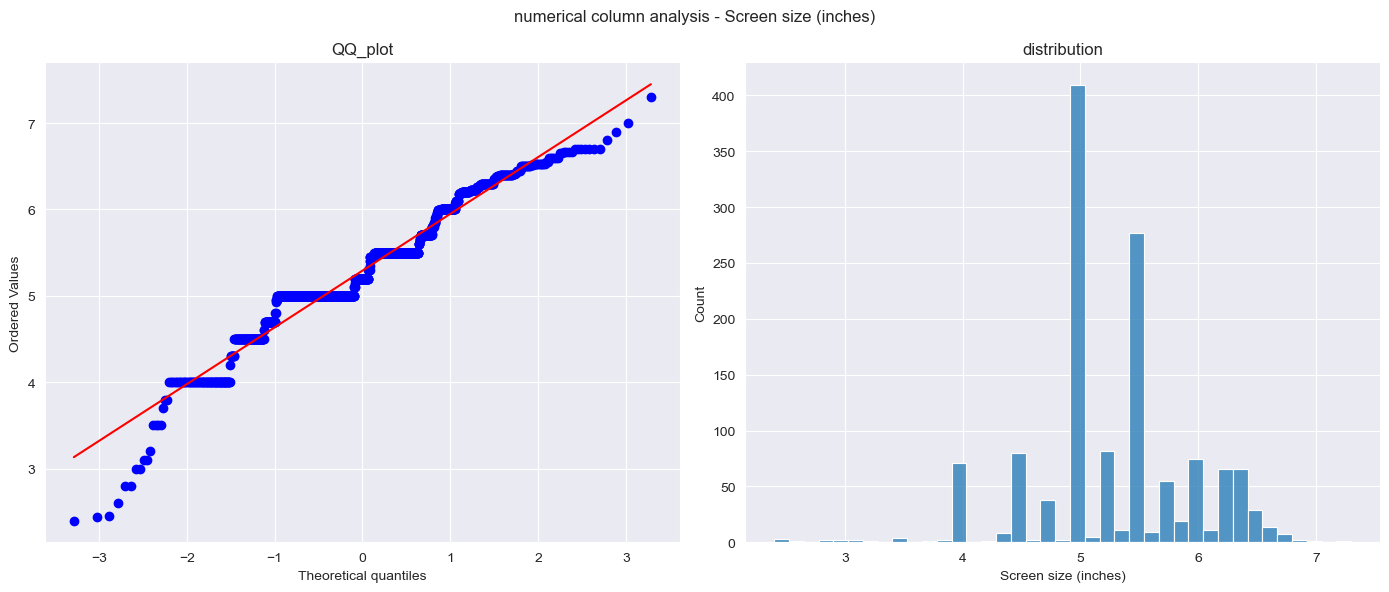

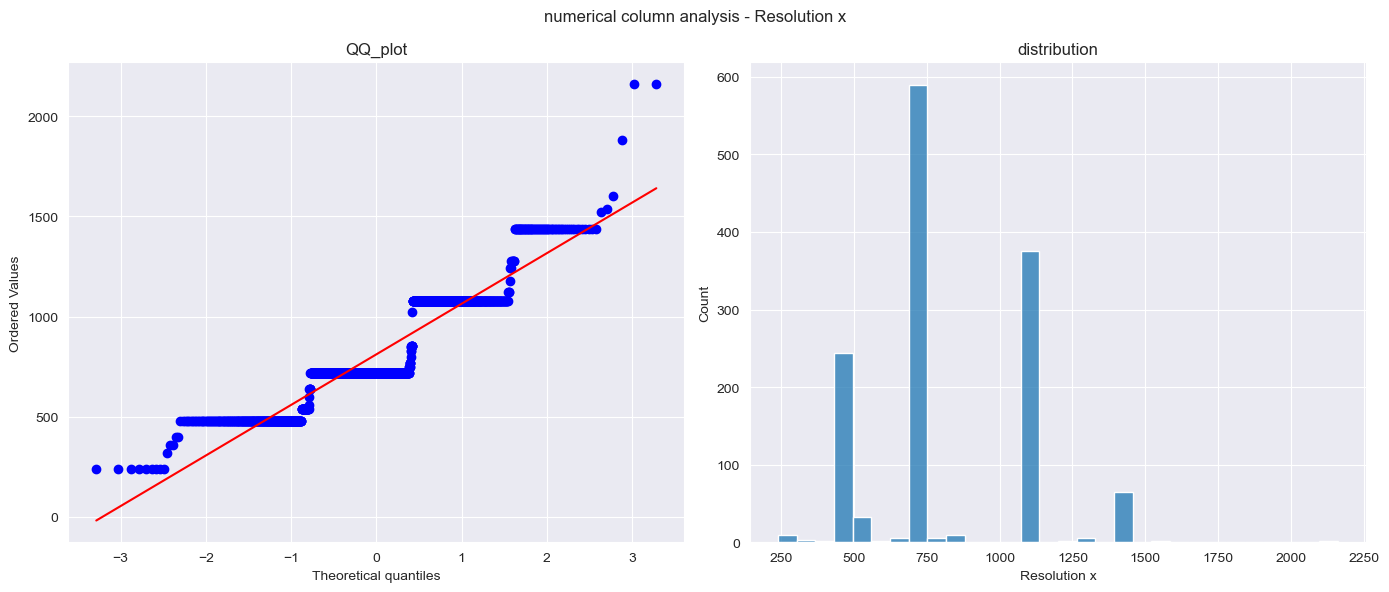

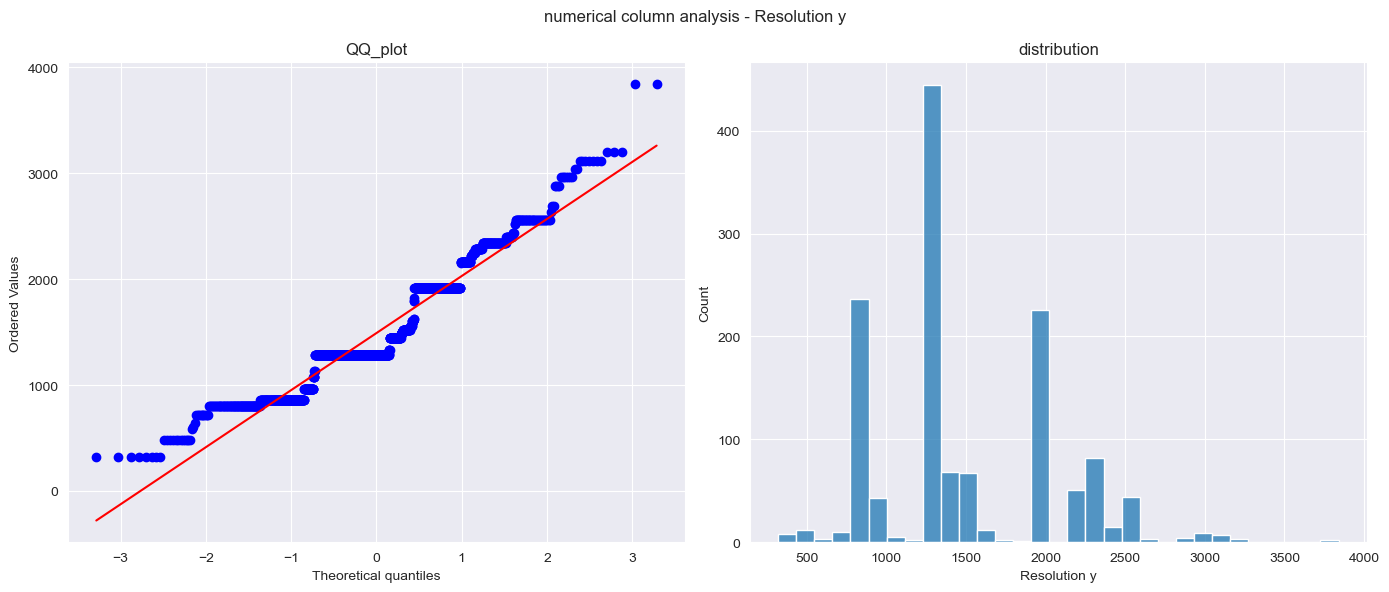

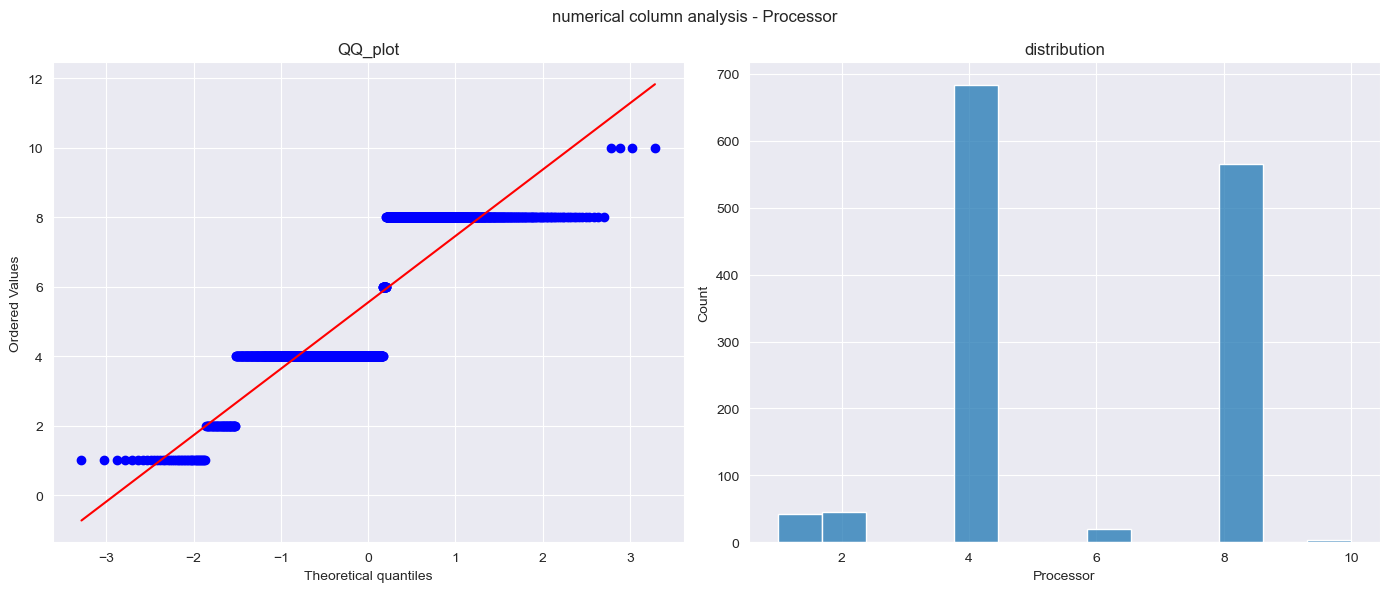

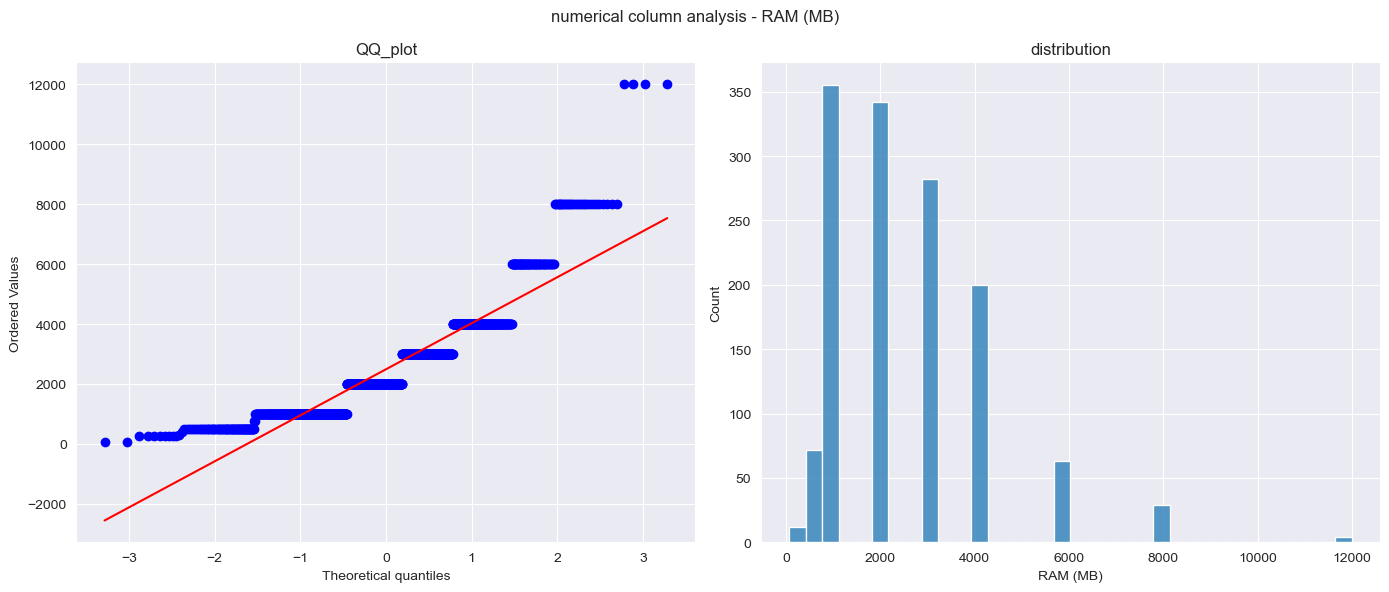

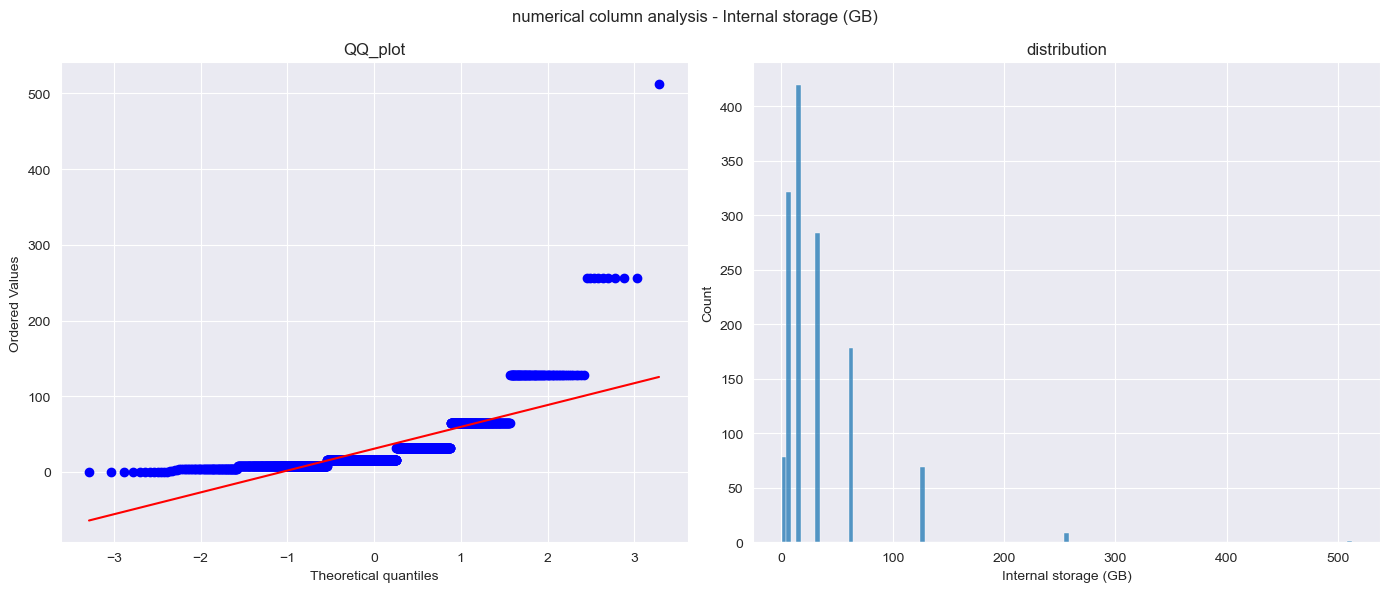

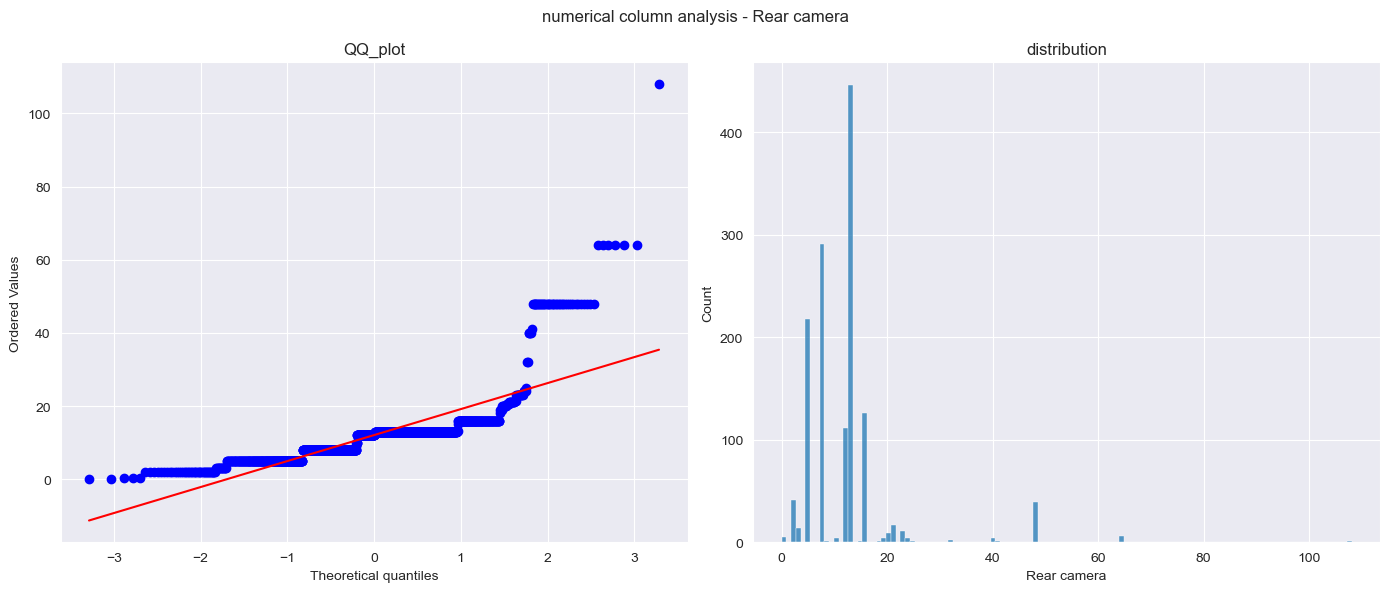

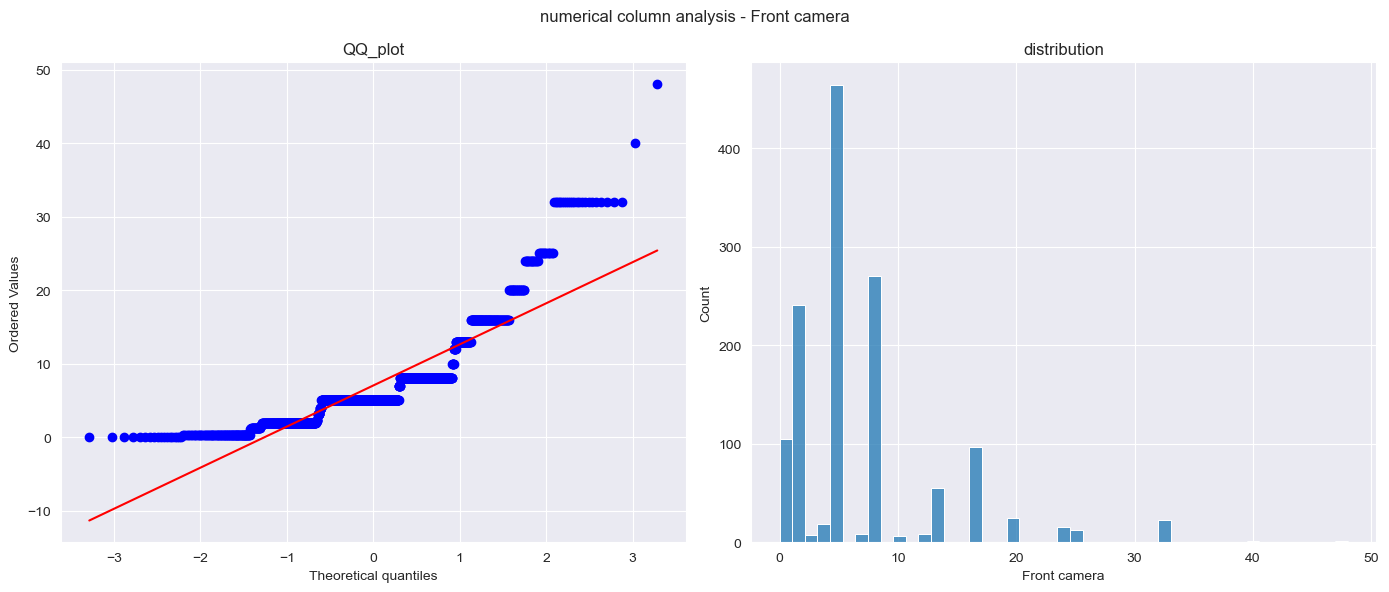

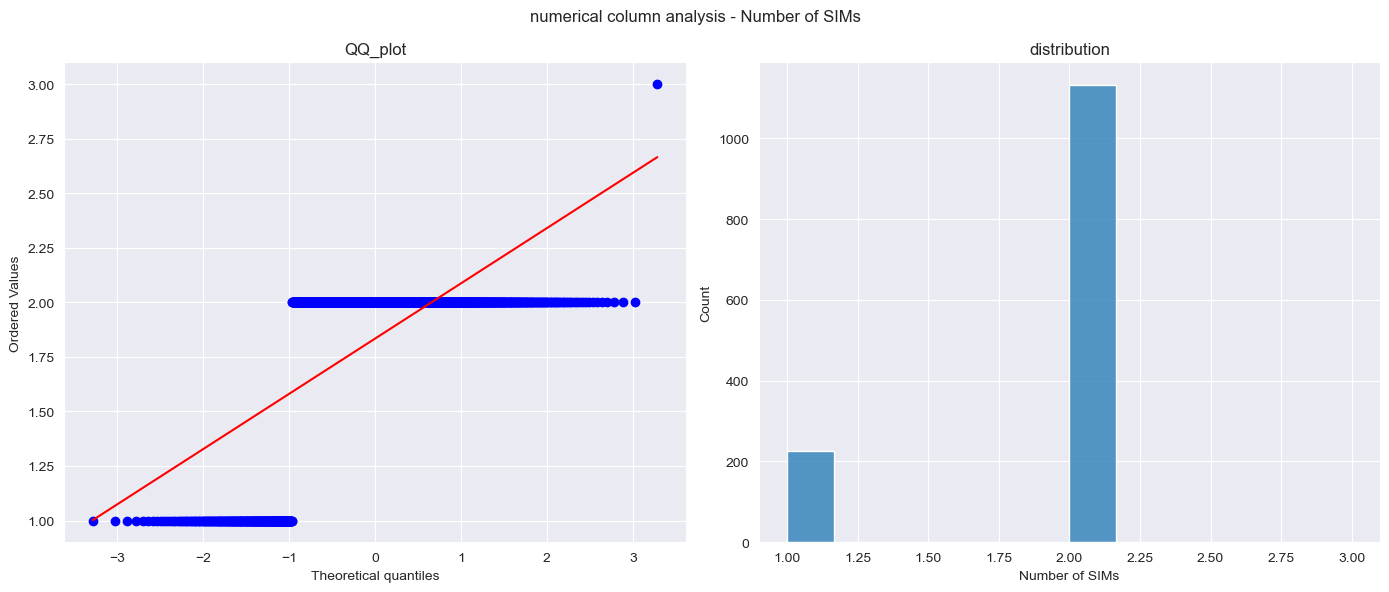

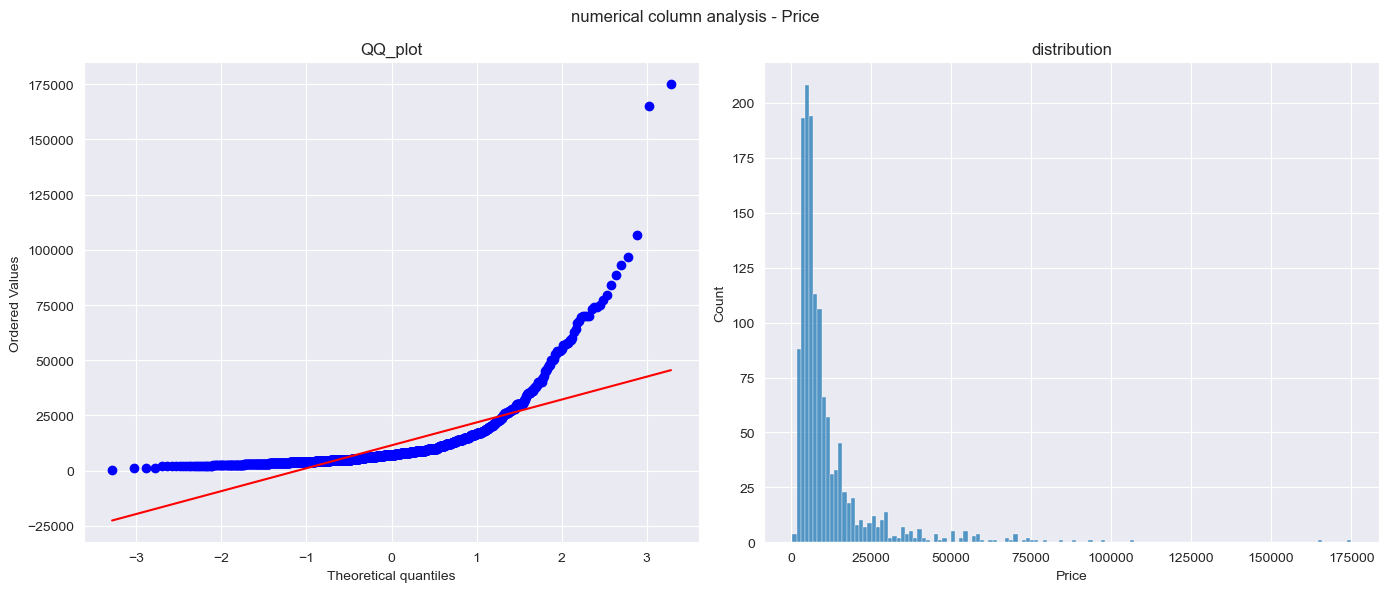

Categorical columns are :['Name', 'Brand', 'Model', 'Touchscreen', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
numerical columns are :['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x', 'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Number of SIMs', 'Price']


In [21]:
feature_analyze.numerical_analyze()

In [22]:
feature_analyze.correlation_with_target(numcols,'Price') #TARGET VARIABLE CORREALTION

Price                     1.000
Internal storage (GB)     0.644
RAM (MB)                  0.613
Resolution y              0.576
Resolution x              0.541
Screen size (inches)      0.402
Rear camera               0.379
Front camera              0.311
Processor                 0.302
Battery capacity (mAh)    0.298
Number of SIMs           -0.162
Name: Price, dtype: float64

In [23]:
feature_analyze.possible_high_correlation(numcols)  #columns possessing high correlation among themselves

{'Front camera',
 'Internal storage (GB)',
 'Price',
 'Processor',
 'RAM (MB)',
 'Rear camera',
 'Resolution y',
 'Screen size (inches)'}

## 5. Model Pre-Processing

- The __outliers__ are handled using various method using experimentation (trail/error)
- __Log transformation__ is used on the target and numeric columns to address the outliers 
- __Visual comparision__ of the transformed columns are carried to verify the applied log_transformation
- __Label encoding__ is used for the converting the categorical features to near numeric representation  

In [24]:
class preProcessing:
    def __init__(self, df):
        #initialising the dataframe(numeric) to be used in this class methods
        self.df = df
        
    def outlireHandeling(self, col):
        '''
            function: outlireHandeling -> Performs the log transformation on the columnn
            arg: col (pandas.core.series.Series) -> column of the data set
            return: 'This column does not exsist in data set' (str) -> if the column does not exsist
        '''
        if col not in self.df.columns.tolist():
            return 'This column does not exsist in data set'
        #applying lograthemic transformation on the target variable
        self.df['logTranforedPrice'] = np.log10(df[col] + 1)
        
    def log_tranformation(self,df):
        
        """
        arg: dataframe(numeric_columns_only)

        function: applying lograthemic transformation on all the numeric columns 

        return: None
        
        """
        for col in df:
            #using lambda to apply log on each rows of the numeric valies 
            self.df[col]=self.df[col].map(lambda i: np.log10(i) if i>0 else 0)
        
    def comparisionofResults(self, col1, col2):
        '''
            function: comparisionofResults -> shows the visual comaparision of two columns in two bar graph
            arg: col1 (pandas.core.series.Series) -> column of the data set
                 col2 (pandas.core.series.Series) -> column of the data set
            return: None
        '''
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        plt.suptitle('Comparision of original price v/s log transformation', fontsize=20)
        sns.histplot(ax=axes[0], x=self.df['Price'], bins=70, kde=True, color=(0.95, 0.1, 0.85))
        axes[0].set_xlabel('Price', fontsize=15)
        axes[0].set_ylabel('Frequency', fontsize=15)
        sns.histplot(ax=axes[1], x=self.df['logTranforedPrice'], bins=50, kde=True, color=(0.2, 0.85, 0.95))
        axes[1].set_xlabel('Log Transformed Price', fontsize=15)
        axes[1].set_ylabel('Frequency', fontsize=15)
        plt.show()
        
    def labelEncoding(self, column):
        '''
            function: labelEncoding -> performs label encoding on the catagorical columns
            arg: column (pandas.core.indexes.base.Index) -> index of the columns 
            return: None
        '''
        #initalizing tthe labelencoder method
        labelEncoder = LabelEncoder()
        for col in column:
            self.df[col] = labelEncoder.fit_transform(self.df[col])

In [25]:
preprocess = preProcessing(df) #creating instance of the class preprocessing 

Given that our target is always a positive number,

we can apply __log transformation__ on our target variable to reduce the skewness and number of outliers.

In [26]:
preprocess.log_tranformation(numcols.drop(columns='Price')) #calling the class_method to apply log_transform

In [27]:
preprocess.outlireHandeling('Price')

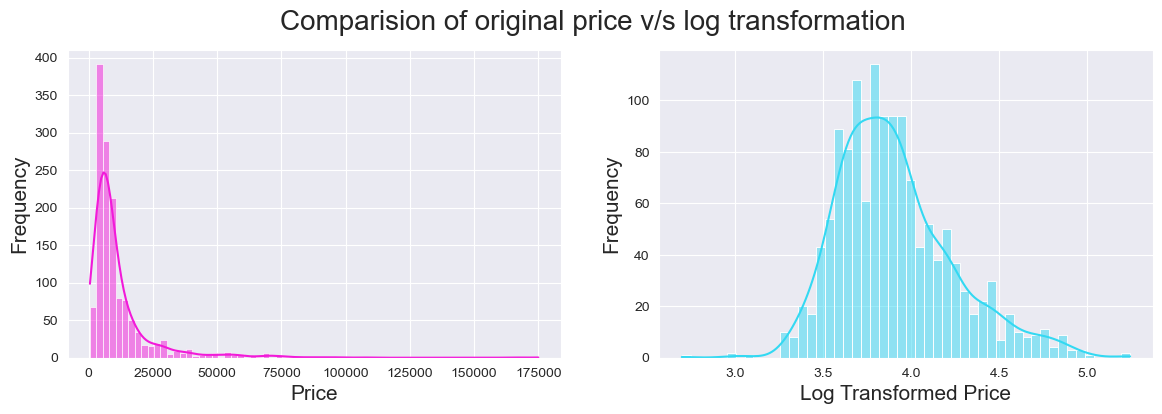

In [28]:
preprocess.comparisionofResults('Price', 'logTranforedPrice')

__Insights:__
- Applying a Log Transformation technique has converted the distribution into a more normal distribution and symmetrical.
- The distribution is no longer right-skewed (skewness > 0) but it is closer to zero (skewness near 0)
- The number of outliers has been significantly reduced

Let's also apply __Label Encoding technique__ to convert our __binary ('Yes' and 'No') features into numerical (0 and 1)__ by mapping values:
- 'Yes' --> 1
- 'No' --> 0

In [29]:
preprocess.labelEncoding(catCols.drop(columns=['Brand']).columns) #label encoding of all the categorical columns

In [30]:
df.head()

Name    Brand  Model  Battery capacity (mAh)  \
0  OnePlus 7T Pro McLaren Edition  OnePlus     49                3.611192   
1                   Realme X2 Pro   Realme   1142                3.602060   
2               iPhone 11 Pro Max    Apple   1288                3.598681   
3                       iPhone 11    Apple   1286                3.492760   
4                    LG G8X ThinQ       LG    522                3.602060   

   Screen size (inches)  Touchscreen  Resolution x  Resolution y  Processor  \
0              0.824126            1      3.158362      3.494155   0.903090   
1              0.812913            1      3.033424      3.380211   0.903090   
2              0.812913            1      3.094122      3.429429   0.778151   
3              0.785330            1      2.918030      3.253338   0.778151   
4              0.806180            1      3.033424      3.369216   0.903090   

   RAM (MB)  ...  Front camera  Operating system  Wi-Fi  Bluetooth  GPS  \
0  4.079181  ...      1.204120                 0      1          1    1   
1  3.778151  ...      1.204120                 0      1          1    1   
2  3.602060  ...      1.079181                 6      1          1    1   
3  3.602060  ...      1.079181                 6      1          1    1   
4  3.778151  ...      1.505150                 0      1          1    1   

   Number of SIMs  3G  4G/ LTE   Price  logTranforedPrice  
0         0.30103   1        1   58998           4.770845  
1         0.30103   1        1   27999           4.447158  
2         0.30103   1        1  106900           5.028982  
3         0.30103   1        1   62900           4.798658  
4         0.00000   0        0   49990           4.698892  

[5 rows x 22 columns]

## 6. Modelling and testing Pipeline

1. __feature selection__: check for the best features present in the data using selectKbest
2. __process_module__: 
       - dropping non-significant columns from the process pipeline
       
       - creating new feature named 'latest_tech_stack' from the 
       columns req_1=['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
       
       -transform pipelin for the numeric columns are created
       
       - passthorough flag is used to carry the other columns as it is
       
       -numeric columns passed through the pipeline are : 
       numeric=['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x','Processor', 'RAM (MB)', 'Internal storage   (GB)','Rear camera', 'Front camera', 'Number of SIMs']
       
       -standardscaler is applied to transform the numeric values
       
       - baseline model and other models are defines : 'Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Ridge Regression'
       
       - other evaluation metrics are calculated like MSE,MAE, R2 and the RMSE for each model --> stored in the dict
       
3. __vis_predction__: plotting the actual and predicted values of each model and compare the performance through interactive graph
4. __tuning_parameter__: defined hyperparameters are processed to check the best model params and the training fit is completed 
5. __post_analysis__: this method is used to compare the top5 best features of each model to the selected features to undersntad the importance of each model and mainly the weights given for the respective features
6. __res_comp__: the evaluation metrics are calculated and tabluated against each other for the training and the testing set 



In [31]:
class training_pipeline:
    def __init__(self,df,target,numeric,categorical,req_1,aplha):

        """
        arg: dataframe
        arg: target --> target variable
        arg: numeric --> numeric columns post_pre_processing and feature selection
        arg: req_1 --> required features for feature engineering
        arg: aplha --> alpha value for the regularizarion techniques

        function: class_constructor

        return: None
        """
        self.df=df
        self.target=target
        self.numeric=numeric
        self.categorical=categorical
        self.combining_features_cat=req_1
        self.alpha=aplha
        self.results = []
        
    def feature_selection(self):
        """
        arg: None

        function: checking the best features present in the dataset using selectKBest 

        return: None
        """
        k = 5  
        selector = SelectKBest(score_func=f_regression, k=k)
        X_selected = selector.fit_transform(self.X, self.y)
        selected_feature_indices = selector.get_support(indices=True)
        self.selected_features = list(self.X.columns[selected_feature_indices])
        print("="*50)
        print(self.selected_features)
        print("="*50)
    def process_module(self):

        """
        arg: None

        function: creating new feature (dimension reduction), process and traiing pipeline

        return: None
        """
        self.df['latest_tech_stack']=self.df[self.combining_features_cat].all(axis=1).astype(int)
        self.column_to_drop_trainig=['Name','Brand','Model','Touchscreen','Resolution y','Wi-Fi','Bluetooth','GPS','3G','4G/ LTE','Price','logTranforedPrice']
        self.X=self.df.drop(columns=self.column_to_drop_trainig)
        self.y=self.df[self.target]
        self.feature_selection()
        numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
        preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, self.numeric)],remainder='passthrough')
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=55)
#         print(type(self.X_train))
        models = {'Linear Regression': LinearRegression(),'Random Forest Regressor': RandomForestRegressor(),'Gradient Boosting Regressor': GradientBoostingRegressor(),
                  'Ridge Regression': Ridge(alpha=self.alpha)}
#         print((self.X_train[:4]))
#         print(type(self.X_train))
        pipeline=Pipeline(steps=[('preprocessor',preprocessor)])
        self.X_train=pipeline.fit_transform(self.X_train)
#         print(self.X_train[:4])
        self.X_test=pipeline.transform(self.X_test)
#         print(self.X_test[:1])
        for model_name,model in models.items():
            self.reg=model
            self.reg.fit(self.X_train,self.y_train)
            self.y_train_pred=self.reg.predict(self.X_train)
            self.y_test_pred=self.reg.predict(self.X_test)
            
            #evaluation
            train_r2=r2_score(self.y_train,self.y_train_pred).round(3)
            test_r2=r2_score(self.y_test,self.y_test_pred).round(3)
            #eval_mse
            train_mse=mean_squared_error(np.power(10, self.y_train), np.power(10, self.y_train_pred)).round(3)
            test_mse=mean_squared_error(np.power(10, self.y_test), np.power(10, self.y_test_pred)).round(3)
#             train_mse=mean_squared_error(self.y_train,self.y_train_pred).round(3)
#             test_mse=mean_squared_error(self.y_test,self.y_test_pred).round(3)
            #eval_mae
    
            train_mae=mean_absolute_error(np.power(10, self.y_train), np.power(10, self.y_train_pred)).round(3)
            test_mae=mean_absolute_error(np.power(10, self.y_test), np.power(10, self.y_test_pred)).round(3)
            
#             train_mae=mean_absolute_error(self.y_train,self.y_train_pred).round(3)
#             test_mae=mean_absolute_error(self.y_test,self.y_test_pred).round(3)
            self.sorted_=self.post_analysis(model_name)
            result={'model':model_name,'mae_train':train_mae,'mae_test':test_mae,'mse_train':train_mse,'mse_test':test_mse,'train_r2':train_r2,'test_r2':test_r2,'feature_seletion':self.selected_features,'feature_importance':self.sorted_}
            self.results.append(result)
            self.vis_prediction(model_name)
            
            
    def vis_prediction(self,model_name):
        """
        arg: name of the model to be plotted

        function: using scatter plot to visulaise the regression model's prediction  

        return: None
        """
        vis_df=pd.DataFrame({'Actual_value':self.y_test,'Prediction':self.y_test_pred})
        fig=px.scatter(vis_df,x='Actual_value',y='Prediction',trendline='ols',title="Performance_{}".format(model_name))
        fig.update_traces(marker=dict(color='blue', size=10))
        fig.update_layout(xaxis=dict(scaleanchor="y",scaleratio=1),yaxis=dict(scaleanchor="x",scaleratio=1))
        fig.show()
        
        
        diff_val=pd.DataFrame({'Difference|Error':(self.y_test-self.y_test_pred)})
        fig2=px.histogram(diff_val,x='Difference|Error',title="Erroe_distribution_in_{}".format(model_name),nbins=25,histnorm='probability density')
        fig2.show()
        
        
        
    def tuning_parameters(self):
        
        """
        arg: None

        function: hyper paramters tuning for the selected models and evaluation of the model resutls 

        return: None
        """
        models={'hp_random_forest':{'base':RandomForestRegressor(),'params':{'n_estimators':[50,75,100],'min_samples_split': [2, 5, 10],'max_depth':[2,6,8]}},
               'hp_boosring':{'base':GradientBoostingRegressor(),'params':{'n_estimators':[50,100,120],'learning_rate': [0.01, 0.05, 0.1],'max_depth':[2,4]}},
               'hp_lasso':{'base':Lasso(),'params':{'alpha':[0.005,.03,.02,.1,.5,10,15,12,25]}}}
        for model_name,model in models.items():
            search=RandomizedSearchCV(model['base'],model['params'],cv=5,n_iter=3,random_state=42,scoring='neg_mean_squared_error')
            search.fit(self.X_train,self.y_train)
            best=search.best_estimator_
            self.reg=best
            self.y_train_pred=self.reg.predict(self.X_train)
            self.y_test_pred=self.reg.predict(self.X_test)
            
            #evaluation
            train_r2=r2_score(self.y_train,self.y_train_pred).round(3)
            test_r2=r2_score(self.y_test,self.y_test_pred).round(3)
            #eval_mse
            
            train_mse=mean_squared_error(np.power(10, self.y_train), np.power(10, self.y_train_pred)).round(3)
            test_mse=mean_squared_error(np.power(10, self.y_test), np.power(10, self.y_test_pred)).round(3)
#             train_mse=mean_squared_error(self.y_train,self.y_train_pred).round(3)
#             test_mse=mean_squared_error(self.y_test,self.y_test_pred).round(3)
            #eval_mae
            train_mae=mean_absolute_error(np.power(10, self.y_train), np.power(10, self.y_train_pred)).round(3)
            test_mae=mean_absolute_error(np.power(10, self.y_test), np.power(10, self.y_test_pred)).round(3)
#             train_mae=mean_absolute_error(self.y_train,self.y_train_pred).round(3)
#             test_mae=mean_absolute_error(self.y_test,self.y_test_pred).round(3)
            self.sorted_=self.post_analysis(model_name)
            
            result={'model':model_name,'mae_train':train_mae,'mae_test':test_mae,'mse_train':train_mse,'mse_test':test_mse,'train_r2':train_r2,'test_r2':test_r2,'feature_seletion':self.selected_features,'feature_importance':self.sorted_}
            self.results.append(result)
            self.vis_prediction(model_name)
            
            
    def post_analysis(self,model_name):

        """
        arg: model_name

        function: finding the best feature set used in that particualr model and get the feature importance  

        return: list of top 5 important features identified in that particular model
        """
        if model_name in['hp_lasso','Linear Regression','Ridge Regression']:
            imp=self.reg.coef_
            print("="*50)
            print(self.reg.coef_)
            print("="*50)
        else:
            imp=self.reg.feature_importances_
            print("="*50)
            print(self.reg.feature_importances_)
            print("="*50)
        impo=pd.DataFrame({'feature_imp':imp}, index=self.X.columns)
        sorted_=impo.sort_values(by='feature_imp',ascending=False).head(5)
        print("="*50)
        print(sorted_)
        print("="*50)
        return(sorted_.index.tolist())
        
            
        
    def res_comp(self):

        """
        arg: None

        function: initializing and forming dataframe

        return: Evaluation metrics of the trained models
        """
        
        return pd.DataFrame(self.results)
        

Let's define constants with the __required columns, numeric columns and the categorical variables__.

In [32]:
numeric=['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x','Processor', 'RAM (MB)', 'Internal storage (GB)','Rear camera', 'Front camera', 'Number of SIMs']
req_1=['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
categorical=['Operating system','latest_tech_stack']

We will test & train the following models:
- __Linear Regression__: because it is easy to understand and it uses low time and cpu resources, suitable for hyperparameter tuning
- __Random Forest__: because it is widely used for both classification and regression problems, and also easy to grasp
- __Gradient Boosting__: because it is a powerful algorithm for regression, based on multiple weak models, adding a layer on top of random forest
- __Ridge Regression__: because it is a common and widely use model for regression problems

In [35]:
model_training=training_pipeline(df,'logTranforedPrice',numeric,categorical,req_1,0.5)

In [36]:
model_training.process_module()

['Screen size (inches)', 'Resolution x', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera']
[-0.00754886  0.00379769  0.09820305 -0.01222565  0.06799212  0.08641511
  0.06465935 -0.04585342 -0.02436228  0.06983926 -0.00437083]
                       feature_imp
Resolution x              0.098203
Internal storage (GB)     0.086415
Number of SIMs            0.069839
RAM (MB)                  0.067992
Rear camera               0.064659


[0.08473493 0.07050539 0.38576167 0.01784956 0.05757034 0.14156369
 0.11719072 0.05086973 0.02764863 0.02773013 0.01857521]
                        feature_imp
Resolution x               0.385762
Internal storage (GB)      0.141564
Rear camera                0.117191
Battery capacity (mAh)     0.084735
Screen size (inches)       0.070505


[0.02460044 0.05708354 0.40088338 0.00876346 0.05985265 0.21683976
 0.12772152 0.02855048 0.02602235 0.04107986 0.00860257]
                       feature_imp
Resolution x              0.400883
Internal storage (GB)     0.216840
Rear camera               0.127722
RAM (MB)                  0.059853
Screen size (inches)      0.057084


[-0.00751863  0.0038438   0.09812662 -0.01218841  0.0679705   0.08631409
  0.06459599 -0.04573011 -0.02439011  0.06981474 -0.00431878]
                       feature_imp
Resolution x              0.098127
Internal storage (GB)     0.086314
Number of SIMs            0.069815
RAM (MB)                  0.067970
Rear camera               0.064596


__Insights:__
Baseline model and other computing models

- Linear regression shows decent performance in both the training and testing (unknown) dataset
- Random forest is highly overfitting with the training data
- Gradient boosting is slight overfitting 
- Ridge regressiin shows good performance in the first experimentation and offers balanced performances

The residuals are plotted using histogram method

In [38]:
model_training.res_comp()

model  mae_train  mae_test     mse_train  \
0            Linear Regression   4860.557  4176.584  1.301979e+08   
1      Random Forest Regressor   1848.239  3592.292  2.048822e+07   
2  Gradient Boosting Regressor   3249.357  3864.197  3.940010e+07   
3             Ridge Regression   4860.885  4176.439  1.302352e+08   

       mse_test  train_r2  test_r2  \
0  7.766114e+07     0.596    0.566   
1  4.856458e+07     0.940    0.646   
2  6.825721e+07     0.787    0.638   
3  7.766983e+07     0.596    0.566   

                                    feature_seletion  \
0  [Screen size (inches), Resolution x, RAM (MB),...   
1  [Screen size (inches), Resolution x, RAM (MB),...   
2  [Screen size (inches), Resolution x, RAM (MB),...   
3  [Screen size (inches), Resolution x, RAM (MB),...   

                                  feature_importance  
0  [Resolution x, Internal storage (GB), Number o...  
1  [Resolution x, Internal storage (GB), Rear cam...  
2  [Resolution x, Internal storage (GB), Rear cam...  
3  [Resolution x, Internal storage (GB), Number o...

## 7. Hyper-parameter tuning

Before running into conclusions let's find the best parameters for each model by performing hyper-parameter tuning.

We will use a __Randomized Search CV__ (cross validation) with 5 folds. This will allow us to test multiple parameters randomly without exhausting our computing resources, and __executing our pipeline efficiently.__

In [40]:
model_training.tuning_parameters()

[0.02520789 0.04837883 0.46092997 0.0114821  0.05590662 0.17575995
 0.12453419 0.02636012 0.02622511 0.03559472 0.0096205 ]
                       feature_imp
Resolution x              0.460930
Internal storage (GB)     0.175760
Rear camera               0.124534
RAM (MB)                  0.055907
Screen size (inches)      0.048379


[0.00490857 0.03685575 0.44007787 0.00057217 0.07732252 0.21207579
 0.14803776 0.01134364 0.01617534 0.05013084 0.00249976]
                       feature_imp
Resolution x              0.440078
Internal storage (GB)     0.212076
Rear camera               0.148038
RAM (MB)                  0.077323
Number of SIMs            0.050131


[ 0.          0.          0.09019238  0.          0.03324367  0.072875
  0.03473938  0.         -0.0091246   0.04540981  0.        ]
                       feature_imp
Resolution x              0.090192
Internal storage (GB)     0.072875
Number of SIMs            0.045410
Rear camera               0.034739
RAM (MB)                  0.033244


__Insights:__
- Our Hyperparameter tuning has reduced the error on most of our models.
- We have found the best parameter for each of our 4 models.
- The most important features mostly repeat themselves among our models

Let's calculate some metrics for both Test and Train subsets, for a fair comparison between models, and to make a decision:
- __MAE__ (Mean Absolute Error)
- __MSE__ (Mean Squared Error)
- __R2__ (R Squared)


In [42]:
results=model_training.res_comp()

In [43]:
results

model  mae_train  mae_test     mse_train  \
0            Linear Regression   4860.557  4176.584  1.301979e+08   
1      Random Forest Regressor   1848.239  3592.292  2.048822e+07   
2  Gradient Boosting Regressor   3249.357  3864.197  3.940010e+07   
3             Ridge Regression   4860.885  4176.439  1.302352e+08   
4             hp_random_forest   3436.422  3646.559  5.147385e+07   
5                  hp_boosring   3975.002  3816.670  7.062987e+07   
6                     hp_lasso   5143.518  4329.775  1.536169e+08   

       mse_test  train_r2  test_r2  \
0  7.766114e+07     0.596    0.566   
1  4.856458e+07     0.940    0.646   
2  6.825721e+07     0.787    0.638   
3  7.766983e+07     0.596    0.566   
4  5.300268e+07     0.778    0.648   
5  6.065147e+07     0.705    0.619   
6  8.470098e+07     0.565    0.550   

                                    feature_seletion  \
0  [Screen size (inches), Resolution x, RAM (MB),...   
1  [Screen size (inches), Resolution x, RAM (MB),...   
2  [Screen size (inches), Resolution x, RAM (MB),...   
3  [Screen size (inches), Resolution x, RAM (MB),...   
4  [Screen size (inches), Resolution x, RAM (MB),...   
5  [Screen size (inches), Resolution x, RAM (MB),...   
6  [Screen size (inches), Resolution x, RAM (MB),...   

                                  feature_importance  
0  [Resolution x, Internal storage (GB), Number o...  
1  [Resolution x, Internal storage (GB), Rear cam...  
2  [Resolution x, Internal storage (GB), Rear cam...  
3  [Resolution x, Internal storage (GB), Number o...  
4  [Resolution x, Internal storage (GB), Rear cam...  
5  [Resolution x, Internal storage (GB), Rear cam...  
6  [Resolution x, Internal storage (GB), Number o...

#### Validation and inference:

In [46]:
results.iloc[:,:-2]

model  mae_train  mae_test     mse_train  \
0            Linear Regression   4860.557  4176.584  1.301979e+08   
1      Random Forest Regressor   1848.239  3592.292  2.048822e+07   
2  Gradient Boosting Regressor   3249.357  3864.197  3.940010e+07   
3             Ridge Regression   4860.885  4176.439  1.302352e+08   
4             hp_random_forest   3436.422  3646.559  5.147385e+07   
5                  hp_boosring   3975.002  3816.670  7.062987e+07   
6                     hp_lasso   5143.518  4329.775  1.536169e+08   

       mse_test  train_r2  test_r2  
0  7.766114e+07     0.596    0.566  
1  4.856458e+07     0.940    0.646  
2  6.825721e+07     0.787    0.638  
3  7.766983e+07     0.596    0.566  
4  5.300268e+07     0.778    0.648  
5  6.065147e+07     0.705    0.619  
6  8.470098e+07     0.565    0.550

## 8. Tuned parameters computing models
We will define a class called Inference to perform the following actions:
- Linear regression model is utilizing the lasso regularisation technique on top with various alpha parameters, the best params gives the best model for this project activity
- Finetuning the hyper_parameters in the Random Forest and gradient boosting models are  not giving excepted resutls as thers is slight overfitting 
- __Display features and feature importance for each model__
- __Compare test and train metrics for each model using bar plots__


In [47]:
class inference:
    def __init__(self,data):
        """
        arg: data --> dataframe to be visulalised and compared 

        function: class constructor 

        return: None
        """
        self.df=data
       
    def feature_understanding(self):
        """
        arg: None

        function: concatinating the feature importance and feature selection columns to check for the match values
        
        aim :  to verify the feature selection by validating the important features of various model

        return: dataframe consists of model name, feature importance and feature selection before training (reference)
        """
        self.exp1=self.df.iloc[:,0]
        self.exp2=self.df.iloc[:,[-2,-1]]
        return(pd.concat([self.exp1,self.exp2],axis=1))
    
    def general_plot(self,x):
        
        """
        arg: scoring metric to be plotted 

        function: plotting bar graph to check the scoring and evaluation metrics for various models

        return: None
        """
        df=self.df

        if df.index.name!='model':
            df.set_index('model',inplace=True)
        df[x].plot(kind='barh',figsize=(14,7))
        plt.show()
        
    def sort_plot(self,x,y):
        
        """
        arg: x--> train set metrics 
        arg: y --> test set metrics
        

        function: unstacked bar chart to compare the model performance and indentify the overfitting and underfitting cases
    

        return: None
        """
        comp=self.df[[x,y]].plot(kind='bar',stacked=False,figsize=(12,6))
        plt.title('Comprasion of {} vs {}'.format(x,y))
        plt.xlabel('Model')
        plt.xticks(rotation=45, ha='right')

        plt.show()
        
    def plotyy(self,x,y):
        
        """
        arg: x--> train set metrics 
        arg: y --> test set metrics
        

        function: interactive bar graph to closely analyse the results     

        return: None
        """
        unstacked = self.df.reset_index().melt(id_vars='model', value_vars=[x, y], var_name='type', value_name='values')
        fig = px.bar(unstacked, x='model', y='values', color='type', barmode='group', )
        fig.show()

In [48]:
inf_=inference(results)

In [49]:
pd.set_option('display.max_colwidth', None)

Let's check the __feature importance of our models.__

In [50]:
inf_.feature_understanding()

model  \
0            Linear Regression   
1      Random Forest Regressor   
2  Gradient Boosting Regressor   
3             Ridge Regression   
4             hp_random_forest   
5                  hp_boosring   
6                     hp_lasso   

                                                                     feature_seletion  \
0  [Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]   
1  [Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]   
2  [Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]   
3  [Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]   
4  [Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]   
5  [Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]   
6  [Screen size (inches), Resolution x, RAM (MB), Internal storage (GB), Rear camera]   

                                                                                 feature_importance  
0                      [Resolution x, Internal storage (GB), Number of SIMs, RAM (MB), Rear camera]  
1  [Resolution x, Internal storage (GB), Rear camera, Battery capacity (mAh), Screen size (inches)]  
2                [Resolution x, Internal storage (GB), Rear camera, RAM (MB), Screen size (inches)]  
3                      [Resolution x, Internal storage (GB), Number of SIMs, RAM (MB), Rear camera]  
4                [Resolution x, Internal storage (GB), Rear camera, RAM (MB), Screen size (inches)]  
5                      [Resolution x, Internal storage (GB), Rear camera, RAM (MB), Number of SIMs]  
6                      [Resolution x, Internal storage (GB), Number of SIMs, Rear camera, RAM (MB)]

Let's __plot bars to compare metrics between our models__ using:
- MAE
- MSE
- R2

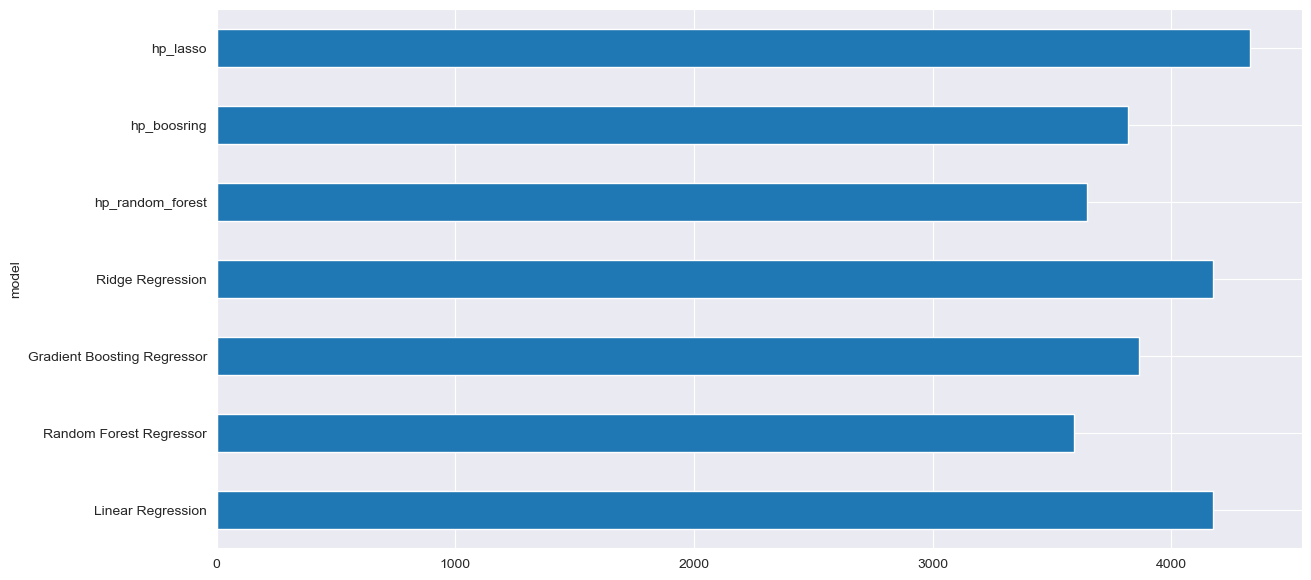

In [52]:
inf_.general_plot('mae_test')

__Insights:__

The __models presenting less absolute error__ are:
- HP Random Forest
- Gradient Boosting Regressor
- Random Forest Regressor

The __models presenting large absolute errors__ are:
- HP Lasso
- Ridge Regression
- Linear Regression

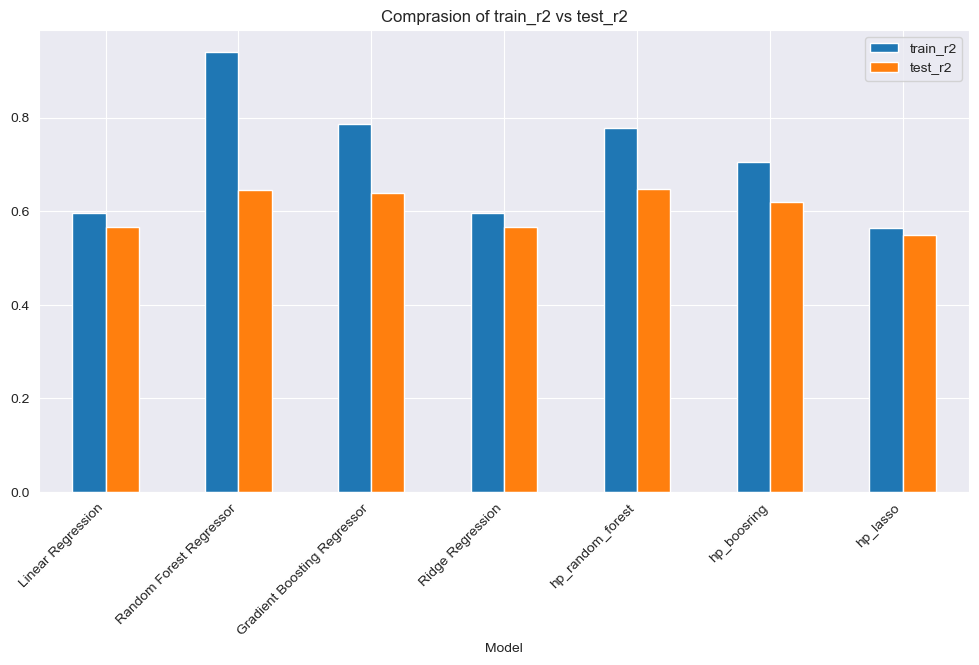

In [53]:
inf_.sort_plot('train_r2','test_r2')

__Insights:__
- Linear Regression, Ridge and Lasso are showing more __stability between their test and train R2 Scores__. However their __scores are low (<60%)__ indicating __underfitting problems__.
- Random Forest models and Gradient Boosting are showing __overfitting problems__ as their __Train scores are way higher than ther test scores__.

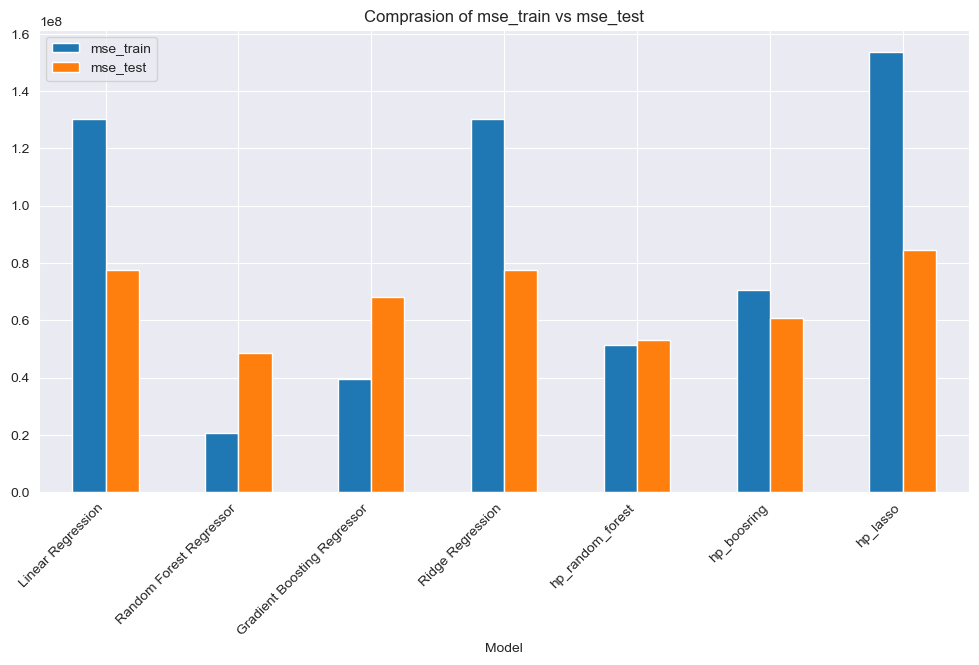

In [56]:
inf_.sort_plot('mse_train','mse_test')

__Insights:__
- MSE metric shows similar results than R2 scores
- However, Random Forest is showing overfitting with very little train error and large test error.
- The most stable models according to MSE are Linear Regression, Ridge, and Lasso

Finally let's compare R2 scores and MSE for test and training using grouped bar plots.

In [57]:
inf_.plotyy('train_r2','test_r2')

In [58]:
inf_.plotyy('mae_train','mae_test')

## 9. Conclusions

__Inference of features and its impact in the model functionality__

- Linear regression model is giving more weights to the following features [Resolution x, Internal storage (GB), Number of SIMs, RAM (MB), Rear camera] which confirms our inital feature selections of top 5 features

- Randomforest model is matching out 3 features with low weightage to the RAM

- Gradient boosting consider all the 5 features as its top 5 important feature but the weighting is not consistent and having large bias

- ridge,lasso and hyper parameter tuned models are reflecting the same 4 features as the greatest importance and their by providing decent prediction 

